# Directed Hamiltonian Cycle Problem (DHCP)

## Notation

* Number of nodes is denoted as $n$. 
* Graph $G=(V,E)$ where;
    * $V \lor v$ is the number of vertices.
    * $E \lor e$ is the number of edges.
* Search time is denoted as $t$.
* Cost (weight) of a cycle/route is deonated as $c$.

## Introduction

A Hamiltonian Cycle is a path that both starts and ends at the same vertex, such that every node in $G$ appears on the cycle exactly once (Hung et al. 2009), a graph that possesses a cycle of this nature is said to be a Hamiltonian graph. The Hamiltonian Cycle Problem (HCP) is a topic has been of great significance in graph theory, that has been studied for many years by mathematicians and continues to be well-studied (Garbe, Mycroft 2016). The Hamilton cycle decision problem (given graph $G$, determine if it contains a Hamilton cycle) was one of Karp’s 21 NP-complete problems (Han, Zhao 2015), meaning that it is both NP (polynomial verifiable) and it is NP-hard (every problem in NP is polytime reducible to it). Languages in the class are described as “complete” as a solution to any problem can be applied to all other problems within the same class. 

HCP has also gained recognition due to its similarity to the Traveling Salesman Problem (TSP), an NP-hard problem, in which a travelling salesman wishes to go to travel to each destination exactly once and return taking the shortest total route (Brucato 2013). Another variation of the Hamiltonian cycle problem is a Hamiltonian Path Problem. A Hamiltonian path is a spanning path, every cycle with a spanning cycle has a spanning path, however, the converse is not true (Hsu, Lin 2008: 141).

In this report we are working with the Directed Hamiltonian Cycle Problem (DHCP) of which there are a number of versions;

* Decision version - Boolean result of; does graph $G$ contain a Hamilton cycle?
* Computational version - Find a DHCP instance from graph $G$.
* Optimization version - Return the optimal solution from all feasible solutions of $G$.

In this case we will evaluate the performance of a variety of methods that solve (or provide the best approximation) for DHCP tested over an extensive range of randomly generated instances with varying number of vertices, edges and structures. These methods are;

1. Exhaustive search;
2. Greedy search;
3. Tabu search (a meta-heuristic approach);

Additionally, we will consider special cases that are tractable in polynomial time.

## Methodology

To generate "random" DHCP instances, where random refers to a graph that is chosen uniformly at random from a set of all graphs with the supplied number of nodes and edges, the gnm_random_graph method from the NetworkX library was used. The aforementioned method takes arguments to specify the number of $v$ vertices and $e$ edges and returns a random graph. Each edge is assigned a weight which allows us to compare the performance of each method by the ‘search cost’ of the optimal route that it finds, this is only possible due to the inclusion of exhaustive search in this assignment, as it is the only search method that is guaranteed to produce an optimal result (if $n$ is small enough).

The ability to generate instances of varying parameter sizes, such as; structure and number of nodes/edges was essential to our testing methodology. To obtain reliable and accurate results testing was done over a broad range of DHCP instances with varying parameter sizes to produce a set of averaged results. We recorded; (1) the time taken for the method to complete; (2) how close optimisation methods get to an optimal solution, based on the cost of the route; and (3) the time taken to decide if a Hamilton cycle exists.
Each method will be tested over random instances  with the following parameter sizes;

* Graph 1 - $G(5,20)$;
* Graph 2 - $G(10,40)$;
* Graph 3 - $G(15,60)$;
* Graph 4 - $G(20,80)$.

Each parameter variation will be tested three times to produce averaged results. These parameters were chosen as it allows us to evaluate the performance over a range of graphs of increasing size, where size is determined by both the number of nodes and vertices in the graph.

### Generating Random Graph Instances

**Import relevant libraries.**

In [111]:
import numpy as np
import random as rnd
import networkx as netx
import matplotlib.pyplot as plt

**Generate a random DHCP instance using NetworkX.**

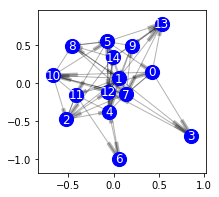

In [135]:
plt.figure(figsize=(3,3))
graph = netx.gnm_random_graph(15,60,directed=True)
weights = np.random.choice(range(1,10), len(list(graph.edges())), replace=True)
for i, (n1, n2) in enumerate(graph.edges()):
    graph[n1][n2]['weight'] = weights[i]
    
graph_pos = netx.spring_layout(graph)
netx.draw_networkx_nodes(graph, graph_pos, node_size = 200, node_color='blue')
netx.draw_networkx_edges(graph, graph_pos, arrowsize = 5, width = 1, alpha=0.3)
netx.draw_networkx_labels(graph, graph_pos, font_size=12, font_color='white', 
                          alpha=1)
plt.show()

## Exhaustive Search

Exhaustive search is an exact method, meaning it will find the solution given enough resources (Hooker 2005), it is also known as the brute force method, as it finds all possible Hamilton cycles (if any exist) and therefore produces an optimal result. Furthermore, it is the only known algorithm that can, at the cost of efficiency. 

### Exhaustive Pseudo-code

1. **exhaustive** (path, start, edge)
2. &nbsp;&nbsp;&nbsp;&nbsp;**for** each element in successor
3. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** successor path length < number of nodes
4. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** element not in path
5. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;append element
6. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**exhaustive** (succesor path, edges)

7. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** length of succesor path == number of nodes
8. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** successor path [0] == element
9. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;succssor path append successor path [0]
10. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;hamilton paths append succesor path

11. **for** each node
12. &nbsp;&nbsp;&nbsp;&nbsp;path [] append start
13. &nbsp;&nbsp;&nbsp;&nbsp;**exhaustive** (path, start, edges)

**Define a method for finding all Hamilton paths (exhaustive).**

In [136]:
def exhaustive(path, start, edges):
    success = [t for (s,t) in edges if s==start]
    path_exist = False
    for t in success:
        success_path = [e for e in path]
        if len(success_path) < n_nodes:
            if t not in success_path:
                success_path.append(t)
                exhaustive(success_path, t, edges)
        if len(success_path) == n_nodes:
            if success_path[0] == t:
                if path_exist == False:
                    #print (("Decision: True | %.6f seconds ") % 
                    #(time.time() - start_time))
                    path_exist = True
                success_path.append(success_path[0])
                hamilton_paths.append(success_path)
                path_search_time.append(time.time() - start_time)

**Initialise variables.**

In [137]:
nodes = list(graph.nodes())
edges = [(u,v) for (u,v,d) in graph.edges(data=True)]
n_nodes = len(nodes)
weights = dict(((u,v),w['weight']) for (u,v,w) in graph.edges(data=True))

**Start exhaustive search and print time performance.**

In [138]:
import time
start_time = time.time()
path_search_time = []
path_start_time = {}
hamilton_paths = []
start = nodes[0]
path_start_time[start] = time.time()

for x in range (n_nodes):
    path = []
    start = nodes[x]
    path.append(start)
    exhaustive(path, start, edges)
    
print("| %s seconds |" % (time.time() - start_time))

| 3.08164381980896 seconds |


**Calculate cost and list Hamilton paths.**

In [139]:
def calc_cost(path):
    cost = 0
    for x in range(len(path)-1):
        cost += weights[path[x], path[x+1]]
    return cost
n_paths = 0
total_search = 0
xp = []
yp = []
list_of_cost = []

for path, search_time in zip(hamilton_paths, path_search_time):
    n_paths = n_paths + 1
    xp.append(n_paths)
    #print("Hamilton cycle: %s, Cost: %d, 
    #Search time: %.6f seconds"%(path, calc_cost(path), search_time))
    total_search = total_search + search_time
    list_of_cost.append(calc_cost(path))
    yp.append(total_search)

**Print total number of cycles, the best cost route and visualise the number of hamilton cycles found over time.**

Total number of Hamilton cycles: 300
Optimal path weight: 68.0


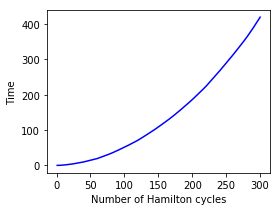

In [140]:
plt.figure(figsize=(4,3))
print("Total number of Hamilton cycles: %s" %(n_paths))
best_c = min(float(s) for s in list_of_cost)
print ("Optimal path weight: %s" %(best_c))
plt.plot(xp, yp, color = 'blue')
plt.xlabel("Number of Hamilton cycles")
plt.ylabel("Time")
plt.show()

### Exhaustive Performance

This table presents the averaged results from testing exhaustive search three times on graphs of increasing size.

| Graph | $V$ | $E$    | Avg. $t$ (method completion)| Avg. $c$  | Avg. num cycles|
| :---: |:-----:| :--------:| :--------:      | :---------:|:-------------: |
| 1     | 5     | 20        | 0.001519        | 16         |120             |
| 2     | 10     | 40        | 0.096325        | 26.6         |583.3             |
| 3     | 15     | 60        | 2.349703        | 61.6         |1108.3             |
| 4     | 20     | 80        | 86.848342        | 81.6         |4773.3             |



**Visualising results.**

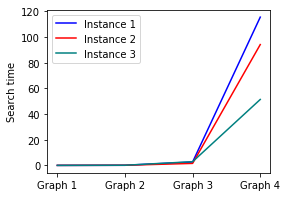

In [141]:
plt.figure(figsize=(4,3))
y_pos = np.array([1, 2, 3, 4])
objects = ['Graph 1', 'Graph 2', 'Graph 3', 'Graph 4']
p_1 = np.array([0.001299, 0.074511, 2.626605, 115.303060])
p_2 = np.array([0.001695, 0.096325, 1.549154, 93.964269])
p_3 = np.array([0.0016608, 0.112928, 2.873351, 51.277697])
plt.plot(y_pos, p_1, alpha=1, label='Instance 1', color = 'Blue' )
plt.plot(y_pos, p_2, alpha=1, label='Instance 2', color = 'Red')
plt.plot(y_pos, p_3, alpha=1, label='Instance 3', color = 'Teal')
plt.xticks(y_pos, objects)
plt.ylabel('Search time')
plt.legend()
axes = plt.gca()
plt.show()

* Method completed in average of $t$ = ~22.32 seconds
* Average solution $c$ = 46.45 
* **Decided** a Hamilton cycle existed in an average of $t$ = 0.093 seconds

As anticipated, $t$ increased factorially as |V| and |E| were increased. Exhaustive search performed efficiently for the first two graphs producing an optimal result, as an exact method always will. However, this method is clearly unsuitable for larger graphs. When |V| and |E| become large exhaustive search becomes prohibited, growing exponentially for NP-hard problems. Exhaustive search has a **time complexity of O(n!)** in the worst case, as the method must visit all the permutations of the vertices (n!) and for each iteration determine if adjacent vertices are viable successors.

## Greedy Search

A greedy algorithm always makes the locally-optimal choice, i.e., expanding from the current vertex to the next with the smallest estimated cost until a cycle is found, with the intention of finding a globally-optimal solution. Unlike exhaustive search, this algorithm is non-optimal and may fail to find a cycle even if one exists (Greco 2008 :8).

### Greedy Pseudo-code

1. **greedy** (path, cost, start)
2. &nbsp;&nbsp;&nbsp;&nbsp;**while** length of successor > 0
3. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;calculate cost
4. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** cost + min cost < optimal path cost
5. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;append to successor path
6. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;calculate new cost
7. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** length of path < number of nodes
8. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**greedy** (path, cost, start)
9. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**else** length of path < number of nodes
10. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** viable path
11. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;calculate to start cost
12. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** new cost + to start cost < optimal path cost
13. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;append to successor path
14. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;optimal path = successor path
15. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;optimal path cost = new cost + to start cost
16. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**else** 
17. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;successor = []

**Initialise variables.**

In [142]:
nodes = list(graph.nodes())
n_nodes = len(nodes)
edges = [(u,v) for (u,v,d) in graph.edges(data=True)]
weights = dict(((u,v),w['weight']) for (u,v,w) in graph.edges(data=True))

optimal_path_cost = 1e+6
optimal_path = []


**Greedy search method.**

In [143]:
def greedy(path, cost, start):
    global optimal_path
    global optimal_path_cost
    success = [t for (s,t) in edges if s==start]
    success = [t for t in success if t not in path]
    path_exist = False
    
    while len(success) > 0:
        costs = [weights[(start,t)] for t in success]
        if cost+min(costs) < optimal_path_cost:
            t = success[np.argmin(costs)]
            success_path = [e for e in path]
            success_path.append(t)
            new_cost = cost + min(costs)
            success.remove(t)
            if len(success_path) < n_nodes:
                greedy(success_path, new_cost, t)
            else:
                if (t, success_path[0]) in edges:
                    to_start_cost = weights[(t, success_path[0])]   
                    if path_exist == False:
                        #print (("Decision: True | %.6f seconds ") 
                        #% (time.time() - start_time))
                        path_exist = True
                    if new_cost + to_start_cost < optimal_path_cost:
                        success_path.append(success_path[0])
                        optimal_path = success_path
                        print("Swap optimal cycle with;")
                        print(optimal_path)
                        optimal_path_cost = new_cost + to_start_cost
                        print(optimal_path_cost)
        else:
            success = []                                    

**Start Greedy search and print results.**

In [144]:
import time
start_time = time.time()
start = nodes[4]
path = []
path.append(start)
greedy(path, 0, start)
print("| %s seconds |" % (time.time() - start_time))
print("Optimal path:")
print((optimal_path))
print("Optimal path cost:")
print(optimal_path_cost)

Swap optimal cycle with;
[4, 5, 9, 13, 7, 0, 10, 8, 1, 3, 12, 14, 2, 11, 6, 4]
68
| 0.37903285026550293 seconds |
Optimal path:
[4, 5, 9, 13, 7, 0, 10, 8, 1, 3, 12, 14, 2, 11, 6, 4]
Optimal path cost:
68


### Greedy Performance

This table presents the averaged results from testing greedy search three times on graphs of increasing size.

| Graph | $V$ | $E$     | Avg. $t$ (method completion)| Avg. $c$  | 
| :---: |:-----:| :--------:| :--------:      | :---------:|
| 1     | 5     | 20        | 0.003771        | 16         |
| 2     | 10     | 40        | 0.017132        | 36         |
| 3     | 15     | 60        | 0.413956        | 61.6         |
| 4     | 20     | 80        | 8.083940      | 85        |

**Visualising performance.**

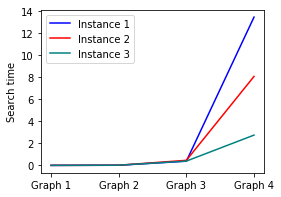

In [145]:
plt.figure(figsize=(4,3))
y_pos = np.array([1, 2, 3, 4])
objects = ['Graph 1', 'Graph 2', 'Graph 3', 'Graph 4']
p_1 = np.array([0.004544, 0.015415, 0.385057, 13.440167])
p_2 = np.array([0.003168, 0.017132, 0.463617, 8.064424])
p_3 = np.array([0.003602, 0.020939, 0.393193, 2.747230])
plt.plot(y_pos, p_1, alpha=1, label='Instance 1', color = 'Blue' )
plt.plot(y_pos, p_2, alpha=1, label='Instance 2', color = 'Red')
plt.plot(y_pos, p_3, alpha=1, label='Instance 3', color = 'Teal')
plt.xticks(y_pos, objects)
plt.ylabel('Search time')
plt.legend()
axes = plt.gca()
plt.show()

* Method completed in average of $t$ = ~2.13 seconds
* Average solution $c$ = 49.65
* **Decided** a Hamilton cycle existed in an average of $t$ = 0.34 seconds

Our results for greedy heuristic show a similar correlation to exhaustive search, in that, $t$ exponentially increases as the graph complexity escalates. However, we can see that greedy search, in most cases, performs considerably faster than exhaustive search. Furthermore, the greedy method often finds a good solution, and sometimes an optimal solution. **Greedy search has a time complexity of $O(2^n)$**.

## Tabu (Meta-heuristic)

Tabu Search is a meta-heuristic search method that directs a local heuristic search procedure used for mathematical optimisation. One of the main components of Tabu Search is its usage of adaptive memory, which forms a more adaptable search behaviour (Glover, Marti 2005). Taking a heuristic-based approximation approach is useful for obtaining close to, but non-optimal results, as finding an optimal solution for DHCP is NP-complete (Gamboa et al. 2004). This method begins by finding an initial solution, after which new solutions are created by swapping the order in which two vertices are visited. Solutions are compared based on the total weight between vertices. A tabu list is used to record solutions to prevent repeatedly cycling through the same set of solutions (Glover, Taillard, Werra 2014). For this project, we used a maximum number of iterations as the stopping criterion.

### Tabu Pseudo-code

1. **tabu** ()
2. &nbsp;&nbsp;&nbsp;&nbsp;best path = initial solution()
3. &nbsp;&nbsp;&nbsp;&nbsp;best path cost = find_cost(best path)
4. &nbsp;&nbsp;&nbsp;&nbsp;current path = best path 
5. &nbsp;&nbsp;&nbsp;&nbsp;current path cost = best path cost
6. &nbsp;&nbsp;&nbsp;&nbsp;**while** itertation < stopping criteria
7. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;swap two vertices of current solution
8. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;path 1 = swap vertices[0] with current path[0]
9. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;path 1 cost = find_cost(path 1)
10. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;path 2 = swap vetices[1] with current path[1]
11. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;path 2 cost = find_cost(path 2)
12. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** path 1 cost <= path 2 cost and path 1 not in tabu list
13. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;current path = path 1
14. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;current path cost = path 1 cost
15. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;add solution to tabu list
16. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** path 1 cost > path 2 cost and path 2 not in tabu list
17. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;current path = path 2
18. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;current path cost = path 2 cost
19. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;add solution to tabu list
20. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iteration++




**Initialise variables.**

In [146]:
nodes = list(graph.nodes())
n_nodes = len(nodes)
edges = [(u,v) for (u,v,d) in graph.edges(data=True)]
weights_list = [(u,v,w['weight']) for (u,v,w) in graph.edges(data=True)]
weights_list.sort(key=lambda x:x[2])

for u in range(n_nodes):
    for v in range(n_nodes):
        if (not u==v) and (not (u,v) in edges):
            weights_list.append((u,v,10)) 
weights = {(u,v):w for (u,v,w) in weights_list}
n_iter = 10000
t = int(np.ceil(np.sqrt(n_nodes)))
tabu = []

**Find initial solution.**

In [147]:
def find_init_solution():
    path = []
    for (u,v,w) in weights_list:
        if not u in path:
            path.append(u)
        if not v in path:
            path.append(v)
        if len(path) == n_nodes:
            path.append(path[0])
            break
    return path

**Define method to calculate path cost.**

In [148]:
def find_cost(path):
    cost = 0
    for x in range(len(path) - 1):
        cost += weights[path[x], path[x+1]]
    return cost

**Start tabu search and print results.**

In [149]:
import time
start_time = time.time()
best_path = find_init_solution()
best_path_cost = find_cost(best_path)
n = 0
curr_path = [e for e in best_path]
curr_path_cost = best_path_cost

while n < n_iter:
    pos = np.random.choice(range(1, n_nodes), n_nodes - 1, replace = False)
    swap_x_pos = pos[0:2]
    swap_y_pos = pos[2:4]
    
    path_1 = [e for e in curr_path]
    path_1[swap_x_pos[0]] = curr_path[swap_y_pos[0]]
    path_1[swap_y_pos[0]] = curr_path[swap_x_pos[0]]
    path_1_cost = find_cost(path_1)
    
    path_2 = [e for e in curr_path]
    path_2[swap_x_pos[1]] = curr_path[swap_y_pos[1]]
    path_2[swap_y_pos[1]] = curr_path[swap_x_pos[1]]
    path_2_cost = find_cost(path_2)
    
    if path_1_cost <= path_2_cost and (not path_1 in tabu):
        curr_path = path_1
        curr_path_cost = path_1_cost
        tabu.append(curr_path)
    if path_1_cost > path_2_cost and (not path_2 in tabu):
        curr_path = path_2
        curr_path_cost = path_2_cost
        tabu.append(curr_path) 
    if len(tabu) > t:
        tabu = tabu[1:]
    n += 1

print("| %s seconds |" % (time.time() - start_time))
print("Best path:")
print(best_path)
print("Best path cost:")
print(best_path_cost)

| 0.3814990520477295 seconds |
Best path:
[2, 4, 5, 9, 8, 10, 7, 11, 6, 12, 3, 14, 1, 13, 0, 2]
Best path cost:
105


### Tabu Performance

This table presents the averaged results from testing tabu search three times on graphs of increasing size.

| Graph | V | E     | Avg. $t$ (method completion)| Avg. $c$  | 
| :---: |:-----:| :--------:| :--------:      | :---------:|
| 1     | 5     | 20        | 0.348870       | 23         |
| 2     | 10     | 40        | 0.378748        | 60.3         |
| 3     | 15     | 60        | 0.440465        | 101.6         |
| 4     | 20     | 80        | 0.470818      | 132.6        |

**Visualising performance.**

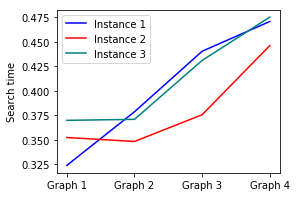

In [150]:
plt.figure(figsize=(4,3))
y_pos = np.array([1, 2, 3, 4])
objects = ['Graph 1', 'Graph 2', 'Graph 3', 'Graph 4']
p_1 = np.array([0.324084, 0.378748, 0.440465, 0.470818])
p_2 = np.array([0.352508, 0.348470, 0.375718, 0.446208])
p_3 = np.array([0.370019, 0.371028, 0.431129, 0.475269])
plt.plot(y_pos, p_1, alpha=1, label='Instance 1', color = 'Blue' )
plt.plot(y_pos, p_2, alpha=1, label='Instance 2', color = 'Red')
plt.plot(y_pos, p_3, alpha=1, label='Instance 3', color = 'Teal')
plt.xticks(y_pos, objects)
plt.ylabel('Search time')
plt.legend()
axes = plt.gca()
plt.show()

* Method completed in average of $t$ = ~0.4 seconds
* Average solution $c$ = 79.38

Tabu search achieves fast search times across all tested DHCP instances, however at the cost of producing an optimal result. Unlike exhaustive and greedy search, this graph presents a more linear relationship between graph size and $t$ for tabu search, suggesting that this methodology would be more suited to larger, more complex instances of this problem. **Tabu search has a time complexity of $O(n)$**, tabu's run-time is limited by the stopping criterion, it returns the best solution within a given number of iterations.

## Special Cases

There are a number of special cases in which the Hamilton Cycle Problem is tractable in polynomial time, in this section we will discuss some of them;

* Dirac’s theorem states that in a graph with $n≥3$ vertices with a minimum degree of at least $deg⁡(v)≥n/2$ must contain a Hamilton cycle (Kühn, Osthus 2011), while this theorem was not initially proved for directed graphs, it was extended by Ghouila-Houri in 1960. They found that for a directed graph the requirements differed, each vertex should have both an in-degree and out-degree of at least $deg⁡(v)≥n/2$. Dirac’s theorem is strengthened by;

* Ore’s theorem states that in a graph with $n≥3$ vertices such that every pair $x≠y$ of non-adjacent vertices satisfies $deg(x)+deg⁡(y)≥n$, must contain a Hamilton cycle (Kühn, Osthus 2011) Solvable in $O(n^2)$ time.

* Umans and Lenhart proved that it was possible to construct a polynomial-time algorithm to solve the HCP in a quad-quad graph, a non-trivial superclass of solid grid graphs (Umans, Lenhart 2009). They did so by using the technique of cycle merging. First, a 2-factor must be discovered, a spanning subgraph in which all vertices have a degree of 2. After which by repeatedly transforming the 2-factor that reduces the number of components the process finds a Hamilton cycle otherwise it terminates if one does not exist (Umans, Lenhart 2009). Solvable in cubic $O(n^3)$ time

* Formin et al. found that many hard problems, including HCP, can be solved in polynomial time on graphs that have a bounded clique-width, however not fixed-parameter tractable (Formin et al. 2009).

* Using strong induction, it is possible to prove that every tournament graph contains a Hamilton path (not necessarily a Hamilton cycle) (Devadas, Lehman 2005). Therefore, by proving a graph is a tournament you also prove it contains a Hamilton path, it is possible to do so in quadratic time $O(n^2)$.

* By proving that a graph $G(V,E)$ is not connected you also prove there is no Hamilton cycle, it is possible to do with BFS/DFS traversal, in $O(V+E)$.

## Conclusion

**Plot averaged results of each methodology**

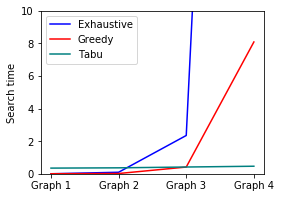

In [151]:
plt.figure(figsize=(4,3))
y_pos = np.array([1, 2, 3, 4])
objects = ['Graph 1', 'Graph 2', 'Graph 3', 'Graph 4']
p_1 = np.array([0.0015189, 0.094588, 2.349703, 86.848342])
p_2 = np.array([0.0037713, 0.017828, 0.413956, 8.083940])
p_3 = np.array([0.348870, 0.366082, 0.415770, 0.464098])

plt.plot(y_pos, p_1, alpha=1, label='Exhaustive', color = 'Blue' )
plt.plot(y_pos, p_2, alpha=1, label='Greedy', color = 'Red')
plt.plot(y_pos, p_3, alpha=1, label='Tabu', color = 'Teal')

plt.xticks(y_pos, objects)
plt.ylabel('Search time')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,10])
plt.show()

**Compare optimal path cost results**

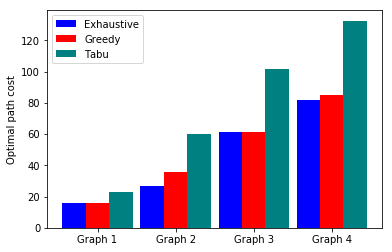

In [152]:
plt.figure(figsize=(4,3))
exhaustive = [16,26.6,61.6,81.6]
greedy = [16,36,61.6,85]
tabu = [23,60.3,101.6,132.6]
ind = np.arange(len(exhaustive))
width = 0.30 
fig, ax = plt.subplots()
rects1 = ax.bar(ind - 0.3, exhaustive, width,
                color='Blue', label='Exhaustive')
rects2 = ax.bar(ind, greedy, width, 
                color='Red', label='Greedy')
rects3 = ax.bar(ind + 0.3, tabu, width,
                color='teal', label='Tabu')
ax.set_ylabel('Optimal path cost')
ax.set_xticks(ind)
ax.set_xticklabels(('Graph 1', 'Graph 2', 'Graph 3', 'Graph 4'))
ax.legend()
plt.show()

Our results show that if you require an optimal result; exhaustive search is the only algorithm that can guarantee that, however, exhaustive has a time complexity of $O(n!)$ and due to finite computational power, for graphs with a high number of vertices this method becomes inappropriate. Consequently, exhaustive search is only suitable when working with smaller graphs. 

An alternative approach is greedy heuristic; our results show that greedy, in most cases, performs faster than exhaustive search. While greedy is not an exact method, it often produces close-to-optimal results and sometimes even optimal results. However, greedy search suffers from the same issue as exhaustive search, in that, $t$ increases exponentially as the graph complexity rises. Therefore, greedy search can only be recommended when the number of vertices $v$ is low. 

Tabu was initially out-performed by both exhaustive and greedy search regarding both $c$ and $t$. However, as $|V|$ and $|E|$ were increased, tabu had a far lower search time. It is important to consider that results tabu produced were considerably further from optimal in comparison to exhaustive and greedy search. The significant advantage of tabu search is that it can still produce results for extensive graphs, long after exhaustive and greedy become unviable. Our results show a more linear relationship between graph size and search time for tabu, which is in stark contrast to the alternate methods evaluated in this paper. It is for these reasons that tabu search would be suitable when working with a large graph.


**In summary;**

* First check if problem is a special case, as it may be possible to solve in polynomial time, otherwise;
* Exhaustive and greedy search are suitable when $n$ is small, the choice between the two is dependant on the importance given to producing an optimal result versus maximising efficiency, otherwise;
* If $n$ is large, use Tabu search or an alternate metaheuristic approach for approximate solutions.

## References

* Brucato, C. (2013) ‘**The Traveling Salesman Problem**’ Department of Mathematics, University of Pittsburgh [online] available from <https://www.mathematics.pitt.edu/sites/default/files/TSP.pdf> [4 April 2018]
* Devadas, S. Lehman, E. (2005) ‘**Graph Theory**’ Mathematics for Computer Science [online] available from <https://dspace.mit.edu/bitstream/handle/1721.1/104427/6-042j-spring-2005/contents/lecture-notes/l8_graphs1.pdf> [22 April 2018]
* Formin, F. Golovach, P. Lokshtanov, D. (2009) ‘**Clique-width: On the Price of Generality**’ Department of Informatics, University of Bergen, N-5020 Bergen, Norway [online] available from <http://www.ii.uib.no/~fomin/fedor/articles> [22 April 2018]
* Gamboa, D. Rego, C. Glover, F. (2004) ‘**Data structures and ejection chains for solving large-scale traveling salesman problems**’ European Journal of Operational Research 160 (2005) 154–171 [online] available from <https://www.sciencedirect.com/science/article/pii/S0377221704002905> [21 April 2018]
* Garbe, F. Mycroft, R. (2016) ‘**The Complexity of the Hamilton Cycle Problem in Hypergraphs of High Minimum Codegree**’ School of Mathematics, University of Birmingham, Birmingham [online] available from <http://web.mat.bham.ac.uk/R.Mycroft/2016STACS.pdf> [4 April 2018]
* Glover, F. Marti, R. (2005) ‘**TABU SEARCH**’ Leeds School of Business, University of Colorado, Campus Box 419, Boulder, CO 80309; Dpto. de Estadística e Investigación Operativa, Universidad de Valencia [online] available from <https://www.uv.es/rmarti/paper/docs/ts2.pdf> [21 April 2018]
* Glover, F. Taillard, E. Werra, D. (2014) ‘**A user’s guide to tabu search**’ Graduate School of Business, University of Colorado, Boulder; Department of Mathematics, Swiss Federal Institute of Technology [online] available from <http://leeds-faculty.colorado.edu/glover/227%20-%20A%20Users%20Guide%20to%20Tabu%20Search%20-%20conversion%203%2026%2014.pdf> [21 April 2018]
* Greco, F. (2008) ‘**Travelling Salesman Problem**’ In-teh [online] available from <http://www.exatas.ufpr.br/portal/docs_degraf/paulo/TravellingSalesmanProblem.pdf> [23 April 2018]
* Han, J. Zhao, Y. (2015) ‘**Minimum codegree threshold for Hamilton l-cycles in k-uniform hypergraphs**’ Journal of Combinatorial Theory, Series A, 132(0):194–223 [4 April 2018]
* Hooker, J. (2005) ‘**Unifying Local and Exhaustive Search**’ Carnegie Mellon University [online] available from <http://public.tepper.cmu.edu/jnh/localsearch.pdf> [23 April 2018]
* Hsu, L., Lin, C. (2008) **'Graph Theory and Interconnection Networks'**. Boca Raton: CRC Press. [5 April 2018]
* Hung, R. Chang, M. Laio, C. (2009) ‘**The Hamiltonian Cycle Problem on Circular-Arc Graphs**’ Proceedings of the International MultiConference of Engineers and Computer Scientists 2009 Vol I IMECS 2009, March 18 - 20, 2009, Hong Kong [online] available from <https://pdfs.semanticscholar.org/aeb0/d61f64c1e36828b766c110c4231972361b30.pdf> [4 April 2018]
* Kühn, D. Osthus, D. (2011) ‘**A survey on Hamilton cycles in directed graphs**’ School of Mathematics, Birmingham University [online] available from <https://arxiv.org/abs/1006.0590> [22 April 2018]
* NetworkX (2018) **Software for complex networks** [online] available from <https://networkx.github.io/> [17 April 2018]
* Umans, C. Lenhart, W. (2009) ‘**Hamiltonian Cycles in Solid Grid Graphs**’ Computer Science Division U.C. Berkeley [online] available from <http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.47.2950&rep=rep1&type=pdf> [22 April 2018]